<a href="https://colab.research.google.com/github/Advanced-Research-Centre/QASM/blob/main/Hamiltonian_Kolmogorov_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.8 MB/s eta 0:00:00


In [2]:
!pip install pybdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 29.5 MB/s eta 0:00:00


In [28]:
import qiskit
from qiskit import *
from pybdm import BDM
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, execute
import qiskit.quantum_info as qi
import random


In [4]:
from qiskit.opflow import Zero, One, I, X, Y, Z
from qiskit.visualization import array_to_latex

<ipython-input-4-92c8566fe969>:1: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import Zero, One, I, X, Y, Z


###Implementing a Toy model Ising Hamiltonian


\begin{equation}
    \mathcal{H} = -J \sum_{\langle i, j\rangle} \hat\sigma_{i}^{z} \otimes \hat\sigma_{j}^{z}
\end{equation}
Assuming the interaction strength is the same between nearest neighbours. $J = 1$

Let's consider a 3-site Hamiltonian:

\begin{equation}
    \mathcal{H}_3 = -\hat\sigma_{1}^{z} \hat\sigma_{2}^{z} \hat{I}_3 -\hat{I}_1 \hat\sigma_{2}^{z} \hat\sigma_{3}^{z}
    \end{equation}


###Simulating using Qiskit

In [5]:
H_3 = -(Z^Z^I) - (I^Z^Z)
print((H_3).to_matrix_op())

Operator([[-2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -2.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


###Simulating without Qiskit
Using *Kronecker product* from numpy/scipy

In [6]:
z = [[1, 0], [0, -1]]
z

[[1, 0], [0, -1]]

In [7]:
i = [[1, 0], [0, 1]]
i

[[1, 0], [0, 1]]

In [8]:
x = [[0, 1], [1, 0]]
x

[[0, 1], [1, 0]]

In [9]:
z1 = np.kron(z, z)
z1

array([[ 1,  0,  0,  0],
       [ 0, -1,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  0,  0,  1]])

In [10]:
zz = np.kron(i, z1)
zz

array([[ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1]])

In [11]:
zz1 = np.kron(z1, i)
zz1

array([[ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1]])

In [30]:
H_2 = -zz -zz1
H_2

array([[-2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -2]])

In [13]:
Ham_bin = np.sign(H_3)
Ham_bin

array([[-1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1]])

In [14]:
print(Ham_bin.dtype)

int64


In [64]:
def M_bdm(M,width=1,frac=2):
  Mr = M.real
  Mi = M.imag
  Mr_quantized = np.round(Mr*(2**frac)).astype(int)
  Mr_bin = np.vectorize(np.binary_repr)(Mr_quantized,width)
  Mi_quantized = np.round(Mi*(2**frac)).astype(int)
  Mi_bin = np.vectorize(np.binary_repr)(Mi_quantized,width)
  M_bin = np.array(list(''.join(list(np.concatenate((np.ndarray.flatten(Mr_bin),np.ndarray.flatten(Mi_bin)))))),dtype=int)
  bdm1d = BDM(ndim=1)
  return bdm1d.bdm(M_bin)

In [16]:
print("Algoithmic Complexity of Hamiltonian =",M_bdm(Ham_bin))

Algoithmic Complexity of Hamiltonian = 139.7948948446379


In [17]:
print("Algoithmic Complexity of Hamiltonian =",M_bdm(H_3))

Algoithmic Complexity of Hamiltonian = 112.87726471724082


In [ ]:
# ignore this cell
Ham_arr = np.vectorize(np.binary_repr)(H_3, 3)
Ham_arr

array([['110', '000', '000', '000', '000', '000', '000', '000'],
       ['000', '000', '000', '000', '000', '000', '000', '000'],
       ['000', '000', '010', '000', '000', '000', '000', '000'],
       ['000', '000', '000', '000', '000', '000', '000', '000'],
       ['000', '000', '000', '000', '000', '000', '000', '000'],
       ['000', '000', '000', '000', '000', '010', '000', '000'],
       ['000', '000', '000', '000', '000', '000', '000', '000'],
       ['000', '000', '000', '000', '000', '000', '000', '110']],
      dtype='<U3')

Hamiltnonian complexity= 144.02074031233025


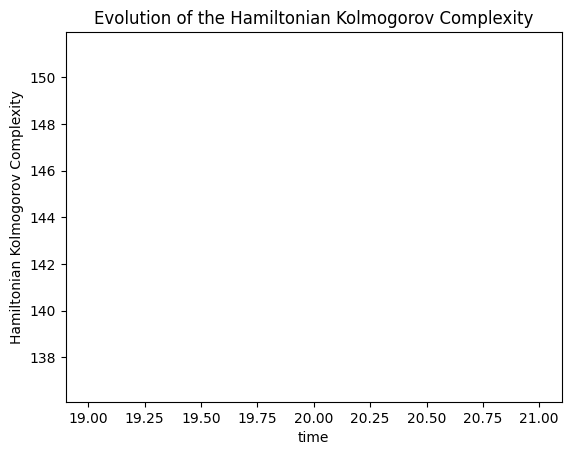

In [88]:
ts = np.linspace(0, 20, 50)

for t in ts:
  U = np.round(sp.linalg.expm(t * H_2 * i))

Ham_KC = M_bdm(U)

print("Hamiltnonian complexity=",  Ham_KC)

plt.plot(t, Ham_KC)
plt.xlabel('time')
plt.ylabel(r'Hamiltonian Kolmogorov Complexity')
plt.title(r'Evolution of the Hamiltonian Kolmogorov Complexity')
plt.show()


